# **Setup**

In [1]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import BernoulliNB
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import StackingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier
from matplotlib import pyplot as plt

from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import f1_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import cross_val_score
from sklearn import metrics

from sklearn.decomposition import PCA
from matplotlib.pyplot import figure
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.model_selection import StratifiedShuffleSplit

import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv('../datasets/preprocessed_spam_ham_phishing.csv')


In [3]:
df.columns

Index(['hops', 'missing_subject', 'missing_to', 'missing_content-type',
       'missing_mime-version', 'missing_x-mailer',
       'missing_content-transfer-encoding', 'missing_x-mimeole',
       'missing_x-priority', 'missing_list-id', 'missing_lines',
       'missing_x-virus-scanned', 'missing_status', 'missing_content-length',
       'missing_precedence', 'missing_delivered-to',
       'missing_list-unsubscribe', 'missing_list-subscribe',
       'missing_list-post', 'missing_list-help', 'missing_x-msmail-priority',
       'missing_x-spam-status', 'missing_sender', 'missing_errors-to',
       'missing_x-beenthere', 'missing_list-archive', 'missing_reply-to',
       'missing_x-mailman-version', 'missing_x-miltered', 'missing_x-uuid',
       'missing_x-virus-status', 'missing_x-spam-level',
       'missing_x-spam-checker-version', 'missing_references',
       'missing_in-reply-to', 'missing_user-agent', 'missing_thread-index',
       'missing_cc', 'missing_received-spf', 'missing_x-orig

**Remove spam emails, only consider ham and phishing:**

In [4]:
df = df[df['label'] != 1]
print(df.shape)

(26508, 95)


In [5]:
df['label'].value_counts()

label
0    25220
2     1288
Name: count, dtype: int64

**Randomly Sample 1288 Ham emails to create a balanced dataset:**

In [6]:
df_ham = df[df['label'] == 0].sample(1288)
df_phish = df[df['label'] == 2]

In [7]:
df_phish = df_phish.assign(label=1)

In [8]:
df_new = pd.concat([df_ham, df_phish], ignore_index=True)
df_new

,hops,missing_subject,missing_to,missing_content-type,missing_mime-version,missing_x-mailer,missing_content-transfer-encoding,missing_x-mimeole,missing_x-priority,missing_list-id,...,domain_match_errors-to_reply-to,domain_match_sender_from,domain_match_references_reply-to,domain_match_references_in-reply-to,domain_match_references_to,domain_match_from_reply-to,domain_match_to_from,domain_match_to_message-id,domain_match_to_received,label
0,1,0,0,0,0,0,1,1,1,0,...,0,0,0,1,0,0,0,0,0,0
1,2,0,0,0,0,1,1,1,1,0,...,0,0,0,0,0,0,0,0,0,0
2,2,0,0,0,0,1,0,1,1,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,1,0
4,2,0,0,0,0,1,1,1,1,0,...,0,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2571,0,0,0,0,0,1,0,1,1,1,...,0,0,0,0,0,0,0,0,0,1
2572,1,0,0,0,0,1,1,1,1,1,...,0,0,0,0,0,0,1,1,0,1
2573,0,0,0,0,0,1,1,1,1,1,...,0,0,0,0,0,0,0,0,0,1
2574,1,0,0,0,0,1,1,1,1,1,...,0,0,0,0,0,0,0,0,0,1


In [9]:
df_new = df_new.sample(frac=1)
df = df_new.reset_index(drop=True)
df

,hops,missing_subject,missing_to,missing_content-type,missing_mime-version,missing_x-mailer,missing_content-transfer-encoding,missing_x-mimeole,missing_x-priority,missing_list-id,...,domain_match_errors-to_reply-to,domain_match_sender_from,domain_match_references_reply-to,domain_match_references_in-reply-to,domain_match_references_to,domain_match_from_reply-to,domain_match_to_from,domain_match_to_message-id,domain_match_to_received,label
0,1,0,0,0,0,1,1,1,1,1,...,0,0,0,0,0,0,0,0,0,1
1,0,0,0,0,0,1,1,1,1,1,...,0,0,0,0,0,1,0,0,1,0
2,0,0,0,0,0,1,0,1,1,1,...,0,0,0,0,0,0,0,0,1,0
3,0,0,0,0,0,1,1,1,1,1,...,0,0,0,0,0,0,1,0,0,1
4,1,0,0,0,0,1,0,1,1,0,...,0,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2571,1,0,0,0,0,1,1,1,1,1,...,0,0,0,0,0,0,1,1,0,1
2572,0,0,0,0,0,0,0,1,0,1,...,0,0,0,0,0,0,0,0,0,1
2573,2,0,0,0,0,0,0,1,1,0,...,0,0,0,0,0,0,0,0,0,0
2574,1,0,0,0,1,1,0,1,1,1,...,0,0,0,0,0,0,0,0,1,0


**Reduce feature set:**

The only features that are kept are domain matching features, as these should generalize across very different email datasets without issue.

In [10]:

feature_list = ['domain_val_message-id',
       'domain_match_message-id_from', 'domain_match_from_return-path',
       'domain_match_message-id_return-path', 'domain_match_message-id_sender',
       'domain_match_message-id_reply-to', 'domain_match_return-path_reply-to',
       'domain_match_reply-to_to', 'domain_match_to_in-reply-to',
       'domain_match_errors-to_message-id', 'domain_match_errors-to_from',
       'domain_match_errors-to_sender', 'domain_match_errors-to_reply-to',
       'domain_match_sender_from', 'domain_match_references_reply-to',
       'domain_match_references_in-reply-to', 'domain_match_references_to',
       'domain_match_from_reply-to', 'domain_match_to_from',
       'domain_match_to_message-id', 'domain_match_to_received', 'label']

df = df[feature_list]

In [11]:
df_Y = df['label']
df_X = df.drop('label', axis=1)

In [12]:
df_X.shape

(2576, 21)

In [13]:
features_list = df_X.columns

**Apply a standard scaler to the full data set:**

In [14]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

scaler.fit(df_X)
df_X = scaler.transform(df_X)
df_X = pd.DataFrame(df_X, columns=features_list)

**Breaking the data into a test and training set (20% test, 80% train)**

In [15]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(df_X, df_Y, test_size=0.20, random_state=42)

In [16]:
X_train.shape

(2060, 21)

In [17]:
X_test.shape

(516, 21)

# **Random Forest:**

Fitting 10 folds for each of 16 candidates, totalling 160 fits
best params
{'rf__criterion': 'entropy', 'rf__min_samples_leaf': 1, 'rf__min_samples_split': 2, 'rf__n_estimators': 100} 

best estimator
Pipeline(steps=[('scale', StandardScaler()),
                ('rf', RandomForestClassifier(criterion='entropy'))])
Accuracy: 97.67441860465115
F1 Score: 97.74436090225565
Recall: 99.61685823754789
Precision: 95.9409594095941
ROC AUC: 97.65156637367592
Confusion Matrix:


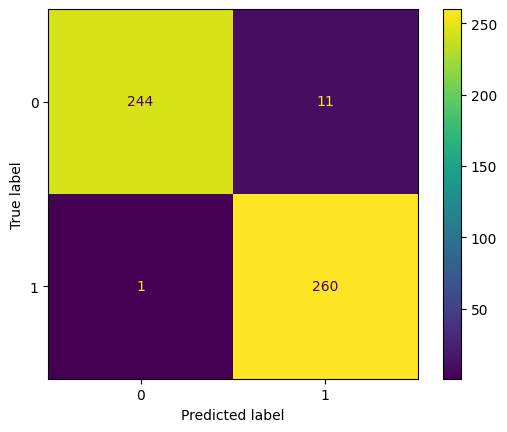

CPU times: user 924 ms, sys: 746 ms, total: 1.67 s
Wall time: 5.51 s


In [18]:
%%time

pipe = Pipeline([("scale", StandardScaler()),
                ("rf", RandomForestClassifier())
                ])

param_grid_list = {'rf__n_estimators': [100, 150],
                  'rf__criterion': ['entropy', 'gini'],
                  'rf__min_samples_split': [2, 3],
                  'rf__min_samples_leaf': [1, 2],
                    }

grid = GridSearchCV(pipe, param_grid=param_grid_list, cv=10, n_jobs=-1, verbose=1)

# Find the best hyperparameters (using 10 fold CV with the hold out fold being the validation set)
grid.fit(X_train, y_train)


print("best params")
print(grid.best_params_, '\n')
print("best estimator")
print(grid.best_estimator_)

# Get the best performing model
best_model = grid.best_estimator_

# Train the best model on the full training data
best_model.fit(X_train, y_train)

# Test the best performing model on the test set
predictions = best_model.predict(X_test)

# Get the evaluation metrics
print('Accuracy:', accuracy_score(y_test, predictions)*100)
print('F1 Score:', f1_score(y_test, predictions)*100)
print('Recall:', recall_score(y_test, predictions)*100)
print('Precision:', precision_score(y_test, predictions)*100)
print('ROC AUC:', roc_auc_score(y_test, predictions)*100)
print('Confusion Matrix:')
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix(y_test, predictions), display_labels = [0, 1])
cm_display.plot()
plt.show()


# **MLP:**

Fitting 10 folds for each of 96 candidates, totalling 960 fits


/home/user01/miniconda3/envs/pi/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/user01/miniconda3/envs/pi/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/user01/miniconda3/envs/pi/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/user01/miniconda3/envs/pi/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


best params
{'mlp__activation': 'tanh', 'mlp__alpha': 0.01, 'mlp__hidden_layer_sizes': (40,), 'mlp__learning_rate': 'constant', 'mlp__solver': 'adam'} 

best estimator
Pipeline(steps=[('scale', StandardScaler()),
                ('mlp',
                 MLPClassifier(activation='tanh', alpha=0.01,
                               hidden_layer_sizes=(40,)))])
Accuracy: 97.86821705426357
F1 Score: 97.92843691148776
Recall: 99.61685823754789
Precision: 96.29629629629629
ROC AUC: 97.84764480504846
Confusion Matrix:


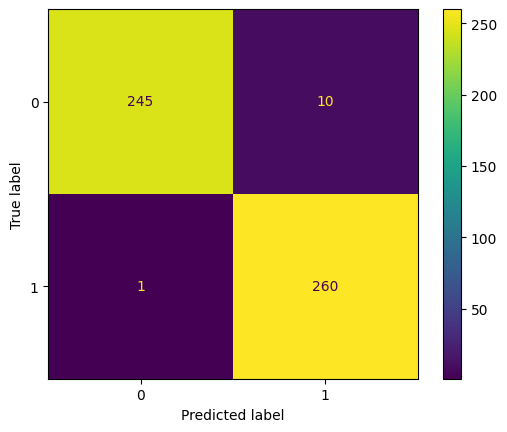

CPU times: user 4.06 s, sys: 1.14 s, total: 5.2 s
Wall time: 1min 51s
[CV 1/10; 2/22] START gbc__learning_rate=0.05, gbc__n_estimators=200............
[CV 1/10; 2/22] END gbc__learning_rate=0.05, gbc__n_estimators=200;, score=0.966 total time=   0.3s
[CV 3/10; 3/22] START gbc__learning_rate=0.1, gbc__n_estimators=100.............
[CV 3/10; 3/22] END gbc__learning_rate=0.1, gbc__n_estimators=100;, score=0.971 total time=   0.2s
[CV 5/10; 5/22] START gbc__learning_rate=0.2, gbc__n_estimators=100.............
[CV 5/10; 5/22] END gbc__learning_rate=0.2, gbc__n_estimators=100;, score=0.976 total time=   0.2s
[CV 6/10; 5/22] START gbc__learning_rate=0.2, gbc__n_estimators=100.............
[CV 6/10; 5/22] END gbc__learning_rate=0.2, gbc__n_estimators=100;, score=0.976 total time=   0.2s
[CV 7/10; 6/22] START gbc__learning_rate=0.2, gbc__n_estimators=200.............
[CV 7/10; 6/22] END gbc__learning_rate=0.2, gbc__n_estimators=200;, score=0.971 total time=   0.3s
[CV 8/10; 6/22] START gbc__le

In [28]:
%%time

pipe = Pipeline([("scale", StandardScaler()),
                ("mlp", MLPClassifier())
                ])

param_grid_list = {'mlp__hidden_layer_sizes': [(20,), (20,20), (40,), (40,40)],
                   'mlp__activation': ['tanh', 'relu'],
                   'mlp__learning_rate': ['constant', 'adaptive'],
                   'mlp__solver': ['adam', 'sgd'],
                   'mlp__alpha': [0.0001, 0.001, 0.01]}

grid = GridSearchCV(pipe, param_grid=param_grid_list, cv=10, n_jobs=-1, verbose=1)

# Find the best hyperparameters (using 10 fold CV with the hold out fold being the validation set)
grid.fit(X_train, y_train)

# Check the hyperparameter results
print("best params")
print(grid.best_params_, '\n')
print("best estimator")
print(grid.best_estimator_)

# Get the best performing model
best_model = grid.best_estimator_

# Train the best model on the full training data
best_model.fit(X_train, y_train)

# Test the best performing model on the test set
predictions = best_model.predict(X_test)

# Get the evaluation metrics
print('Accuracy:', accuracy_score(y_test, predictions)*100)
print('F1 Score:', f1_score(y_test, predictions)*100)
print('Recall:', recall_score(y_test, predictions)*100)
print('Precision:', precision_score(y_test, predictions)*100)
print('ROC AUC:', roc_auc_score(y_test, predictions)*100)
print('Confusion Matrix:')
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix(y_test, predictions), display_labels = [0, 1])
cm_display.plot()
plt.show()


In [ ]:
## save model
import pickle
filename = 'finalized_model_emails_header_classification.sav'
pickle.dump(model, open(filename, 'wb'))


# **Logistic Regression:**

Fitting 10 folds for each of 144 candidates, totalling 1440 fits


/home/user01/miniconda3/envs/pi/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/user01/miniconda3/envs/pi/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/user01/miniconda3/envs/pi/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/user01/miniconda3/envs/pi/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/user01/miniconda3/envs/pi/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/user01/minicon

best params
{'lr__C': 10, 'lr__fit_intercept': True, 'lr__max_iter': 500, 'lr__penalty': 'l1', 'lr__solver': 'saga', 'lr__tol': 0.001} 

best estimator
Pipeline(steps=[('scale', StandardScaler()),
                ('lr',
                 LogisticRegression(C=10, max_iter=500, penalty='l1',
                                    solver='saga', tol=0.001))])
Accuracy: 97.67441860465115
F1 Score: 97.74436090225565
Recall: 99.61685823754789
Precision: 95.9409594095941
ROC AUC: 97.65156637367592
Confusion Matrix:


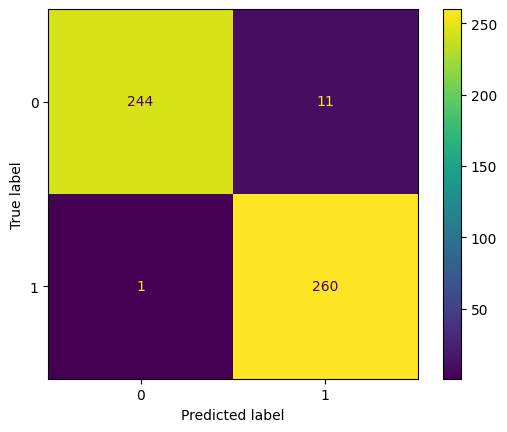

CPU times: user 1.2 s, sys: 889 ms, total: 2.09 s
Wall time: 5.1 s


In [20]:
%%time

pipe = Pipeline([("scale", StandardScaler()),
                ("lr", LogisticRegression())
                ])

param_grid_list = {'lr__max_iter': [500],
                  'lr__solver': ['newton-cg', 'lbfgs', 'sag', 'saga'],
                  'lr__fit_intercept': [True, False],
                  'lr__tol': [0.0001, 0.001],
                  'lr__penalty': ['l1', 'l2', 'elasticnet'],
                  'lr__C': [0.1, 1, 10]}

grid = GridSearchCV(pipe, param_grid=param_grid_list, cv=10, n_jobs=-1, verbose=1)

# Find the best hyperparameters (using 10 fold CV with the hold out fold being the validation set)
grid.fit(X_train, y_train)

# Check the hyperparameter results
print("best params")
print(grid.best_params_, '\n')
print("best estimator")
print(grid.best_estimator_)

# Get the best performing model
best_model = grid.best_estimator_

# Train the best model on the full training data
best_model.fit(X_train, y_train)

# Test the best performing model on the test set
predictions = best_model.predict(X_test)

# Get the evaluation metrics
print('Accuracy:', accuracy_score(y_test, predictions)*100)
print('F1 Score:', f1_score(y_test, predictions)*100)
print('Recall:', recall_score(y_test, predictions)*100)
print('Precision:', precision_score(y_test, predictions)*100)
print('ROC AUC:', roc_auc_score(y_test, predictions)*100)
print('Confusion Matrix:')
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix(y_test, predictions), display_labels = [0, 1])
cm_display.plot()
plt.show()


# **SVM:**

Fitting 10 folds for each of 108 candidates, totalling 1080 fits
best params
{'svc__C': 10, 'svc__degree': 3, 'svc__kernel': 'linear', 'svc__tol': 0.001} 

best estimator
Pipeline(steps=[('scale', StandardScaler()),
                ('svc', SVC(C=10, kernel='linear'))])
Accuracy: 97.67441860465115
F1 Score: 97.74436090225565
Recall: 99.61685823754789
Precision: 95.9409594095941
ROC AUC: 97.65156637367592
Confusion Matrix:


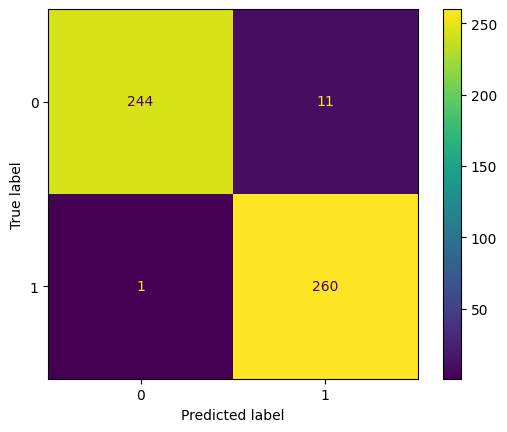

CPU times: user 771 ms, sys: 225 ms, total: 996 ms
Wall time: 4.3 s


In [21]:
%%time

pipe = Pipeline([("scale", StandardScaler()),
                ("svc", SVC())
                ])

param_grid_list = {'svc__C': [0.1, 1, 10],
                  'svc__kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
                  'svc__degree': [3, 4, 5],
                  'svc__tol': [0.001, 0.0001, 0.01]}

grid = GridSearchCV(pipe, param_grid=param_grid_list, cv=10, n_jobs=-1, verbose=1)

# Find the best hyperparameters (using 10 fold CV with the hold out fold being the validation set)
grid.fit(X_train, y_train)

# Check the hyperparameter results
svm_df = pd.DataFrame(grid.cv_results_)
# Check the hyperparameter results
print("best params")
print(grid.best_params_, '\n')
print("best estimator")
print(grid.best_estimator_)

# Get the best performing model
best_model = grid.best_estimator_

# Train the best model on the full training data
best_model.fit(X_train, y_train)

# Test the best performing model on the test set
predictions = best_model.predict(X_test)

# Get the evaluation metrics
print('Accuracy:', accuracy_score(y_test, predictions)*100)
print('F1 Score:', f1_score(y_test, predictions)*100)
print('Recall:', recall_score(y_test, predictions)*100)
print('Precision:', precision_score(y_test, predictions)*100)
print('ROC AUC:', roc_auc_score(y_test, predictions)*100)
print('Confusion Matrix:')
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix(y_test, predictions), display_labels = [0, 1])
cm_display.plot()
plt.show()

# **Decision Tree:**

Fitting 10 folds for each of 108 candidates, totalling 1080 fits
best params
{'dt__ccp_alpha': 0, 'dt__criterion': 'entropy', 'dt__min_samples_leaf': 1, 'dt__min_samples_split': 2} 

best estimator
Pipeline(steps=[('scale', StandardScaler()),
                ('dt',
                 DecisionTreeClassifier(ccp_alpha=0, criterion='entropy'))])
Accuracy: 97.28682170542635
F1 Score: 97.35849056603773
Recall: 98.85057471264368
Precision: 95.91078066914498
ROC AUC: 97.26842461122381
Confusion Matrix:


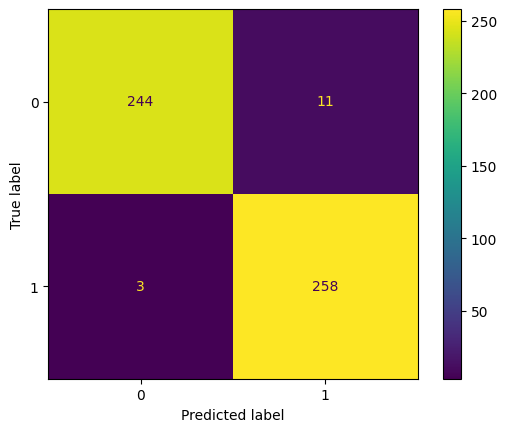

CPU times: user 835 ms, sys: 245 ms, total: 1.08 s
Wall time: 1.24 s


In [22]:
%%time

pipe = Pipeline([("scale", StandardScaler()),
                ("dt", DecisionTreeClassifier())
                ])

param_grid_list = {'dt__criterion': ['entropy', 'gini'],
                  'dt__min_samples_split': [2, 3, 4],
                  'dt__min_samples_leaf': [1, 2, 3],
                  'dt__ccp_alpha': [0, 0.005, 0.01, 0.025, 0.05, 0.1]}

grid = GridSearchCV(pipe, param_grid=param_grid_list, cv=10, n_jobs=-1, verbose=1)

# Find the best hyperparameters (using 10 fold CV with the hold out fold being the validation set)
grid.fit(X_train, y_train)

# Check the hyperparameter results
print("best params")
print(grid.best_params_, '\n')
print("best estimator")
print(grid.best_estimator_)

# Get the best performing model
best_model = grid.best_estimator_

# Train the best model on the full training data
best_model.fit(X_train, y_train)

# Test the best performing model on the test set
predictions = best_model.predict(X_test)

# Get the evaluation metrics
print('Accuracy:', accuracy_score(y_test, predictions)*100)
print('F1 Score:', f1_score(y_test, predictions)*100)
print('Recall:', recall_score(y_test, predictions)*100)
print('Precision:', precision_score(y_test, predictions)*100)
print('ROC AUC:', roc_auc_score(y_test, predictions)*100)
print('Confusion Matrix:')
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix(y_test, predictions), display_labels = [0, 1])
cm_display.plot()
plt.show()


# **Naive Bayes (Gaussian):**

Fitting 10 folds for each of 3 candidates, totalling 30 fits
best params
{'gnb__var_smoothing': 1e-09} 

best estimator
Pipeline(steps=[('scale', StandardScaler()), ('gnb', GaussianNB())])
Accuracy: 86.04651162790698
F1 Score: 87.75510204081634
Recall: 98.85057471264368
Precision: 78.89908256880734
ROC AUC: 85.89587559161596
Confusion Matrix:


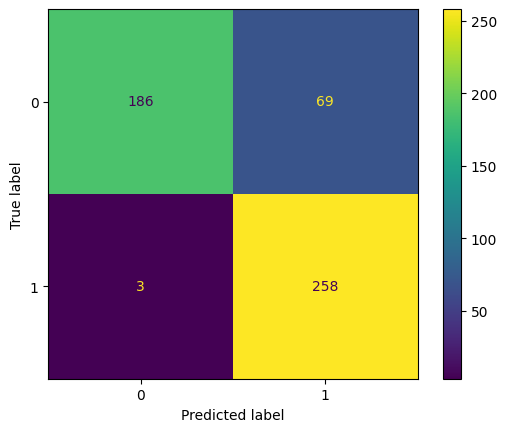

CPU times: user 209 ms, sys: 131 ms, total: 340 ms
Wall time: 180 ms


In [23]:
%%time

pipe = Pipeline([("scale", StandardScaler()),
                ("gnb", GaussianNB())
                ])

param_grid_list = {'gnb__var_smoothing': [1E-9, 1E-10, 1E-8]}

grid = GridSearchCV(pipe, param_grid=param_grid_list, cv=10, n_jobs=-1, verbose=1)

# Find the best hyperparameters (using 10 fold CV with the hold out fold being the validation set)
grid.fit(X_train, y_train)

# Check the hyperparameter results
print("best params")
print(grid.best_params_, '\n')
print("best estimator")
print(grid.best_estimator_)

# Get the best performing model
best_model = grid.best_estimator_

# Train the best model on the full training data
best_model.fit(X_train, y_train)

# Test the best performing model on the test set
predictions = best_model.predict(X_test)

# Get the evaluation metrics
print('Accuracy:', accuracy_score(y_test, predictions)*100)
print('F1 Score:', f1_score(y_test, predictions)*100)
print('Recall:', recall_score(y_test, predictions)*100)
print('Precision:', precision_score(y_test, predictions)*100)
print('ROC AUC:', roc_auc_score(y_test, predictions)*100)
print('Confusion Matrix:')
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix(y_test, predictions), display_labels = [0, 1])
cm_display.plot()
plt.show()


# **AdaBoost:**

Fitting 10 folds for each of 56 candidates, totalling 560 fits
best params
{'ab__algorithm': 'SAMME.R', 'ab__learning_rate': 1.75, 'ab__n_estimators': 50} 

best estimator
Pipeline(steps=[('scale', StandardScaler()),
                ('ab', AdaBoostClassifier(learning_rate=1.75))])
Accuracy: 97.67441860465115
F1 Score: 97.74436090225565
Recall: 99.61685823754789
Precision: 95.9409594095941
ROC AUC: 97.65156637367592
Confusion Matrix:


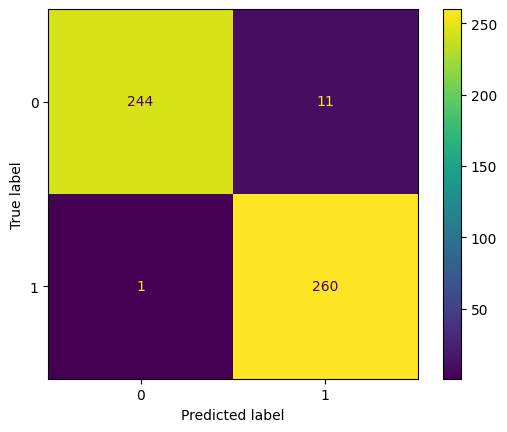

CPU times: user 1.1 s, sys: 213 ms, total: 1.32 s
Wall time: 17 s


In [24]:
%%time

pipe = Pipeline([("scale", StandardScaler()),
                ("ab", AdaBoostClassifier())
                ])

param_grid_list = {'ab__n_estimators': [50, 100, 150, 200],
                  'ab__learning_rate': [0.95, 1, 1.05, 1.25, 1.5, 1.75, 2],
                  'ab__algorithm': ['SAMME', 'SAMME.R']}

grid = GridSearchCV(pipe, param_grid=param_grid_list, cv=10, n_jobs=-1, verbose=1)

# Find the best hyperparameters (using 10 fold CV with the hold out fold being the validation set)
grid.fit(X_train, y_train)

# Check the hyperparameter results
print("best params")
print(grid.best_params_, '\n')
print("best estimator")
print(grid.best_estimator_)

# Get the best performing model
best_model = grid.best_estimator_

# Train the best model on the full training data
best_model.fit(X_train, y_train)

# Test the best performing model on the test set
predictions = best_model.predict(X_test)

# Get the evaluation metrics
print('Accuracy:', accuracy_score(y_test, predictions)*100)
print('F1 Score:', f1_score(y_test, predictions)*100)
print('Recall:', recall_score(y_test, predictions)*100)
print('Precision:', precision_score(y_test, predictions)*100)
print('ROC AUC:', roc_auc_score(y_test, predictions)*100)
print('Confusion Matrix:')
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix(y_test, predictions), display_labels = [0, 1])
cm_display.plot()
plt.show()


**GradientBoostingClassifier:**

Fitting 10 folds for each of 22 candidates, totalling 220 fits
best params
{'gbc__learning_rate': 0.9, 'gbc__n_estimators': 100} 

best estimator
Pipeline(steps=[('scale', StandardScaler()),
                ('gbc', GradientBoostingClassifier(learning_rate=0.9))])
Accuracy: 97.67441860465115
F1 Score: 97.74436090225565
Recall: 99.61685823754789
Precision: 95.9409594095941
ROC AUC: 97.65156637367592
Confusion Matrix:


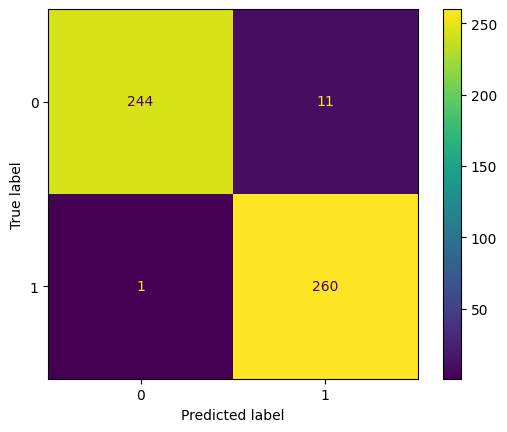

CPU times: user 559 ms, sys: 174 ms, total: 733 ms
Wall time: 5.17 s


In [25]:
%%time

pipe = Pipeline([("scale", StandardScaler()),
                ("gbc", GradientBoostingClassifier())
                ])

param_grid_list = {
                   'gbc__learning_rate': [0.05, 0.1, 0.2, 0.25, 0.30, 0.35, 0.40, 0.5, 0.6, 0.7, 0.9],
                   'gbc__n_estimators': [100, 200]
                  }

grid = GridSearchCV(pipe, param_grid=param_grid_list, cv=10, n_jobs=-1, verbose=10)

# Find the best hyperparameters (using 10 fold CV with the hold out fold being the validation set)
grid.fit(X_train, y_train)

# Check the hyperparameter results
print("best params")
print(grid.best_params_, '\n')
print("best estimator")
print(grid.best_estimator_)

# Get the best performing model
best_model = grid.best_estimator_

# Train the best model on the full training data
best_model.fit(X_train, y_train)

# Test the best performing model on the test set
predictions = best_model.predict(X_test)

# Get the evaluation metrics
print('Accuracy:', accuracy_score(y_test, predictions)*100)
print('F1 Score:', f1_score(y_test, predictions)*100)
print('Recall:', recall_score(y_test, predictions)*100)
print('Precision:', precision_score(y_test, predictions)*100)
print('ROC AUC:', roc_auc_score(y_test, predictions)*100)
print('Confusion Matrix:')
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix(y_test, predictions), display_labels = [0, 1])
cm_display.plot()
plt.show()


**KNN:**

Fitting 10 folds for each of 36 candidates, totalling 360 fits
best params
{'knn__algorithm': 'auto', 'knn__leaf_size': 15, 'knn__n_neighbors': 10, 'knn__p': 1, 'knn__weights': 'distance'} 

best estimator
Pipeline(steps=[('scale', StandardScaler()),
                ('knn',
                 KNeighborsClassifier(leaf_size=15, n_neighbors=10, p=1,
                                      weights='distance'))])
Accuracy: 97.28682170542635
F1 Score: 97.35849056603773
Recall: 98.85057471264368
Precision: 95.91078066914498
ROC AUC: 97.26842461122381
Confusion Matrix:


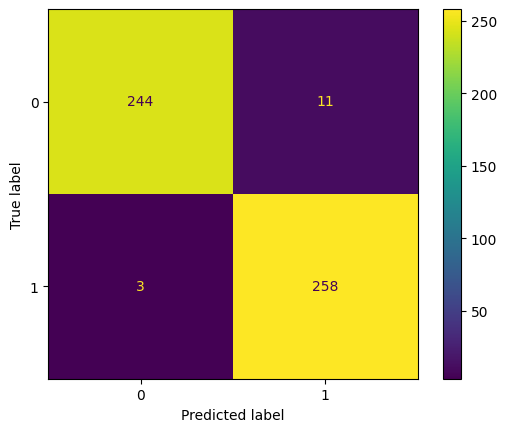

CPU times: user 854 ms, sys: 797 ms, total: 1.65 s
Wall time: 799 ms


In [26]:
%%time

pipe = Pipeline([("scale", StandardScaler()),
                ("knn", KNeighborsClassifier())
                ])

param_grid_list = {'knn__n_neighbors': [1, 10, 20],
                  'knn__weights': ['uniform', 'distance'],
                  'knn__p': [1, 2],
                  'knn__algorithm': ['auto'],
                  'knn__leaf_size': [15, 30, 45]}

grid = GridSearchCV(pipe, param_grid=param_grid_list, cv=10, n_jobs=-1, verbose=1)

# Find the best hyperparameters (using 10 fold CV with the hold out fold being the validation set)
grid.fit(X_train, y_train)

# Check the hyperparameter results
print("best params")
print(grid.best_params_, '\n')
print("best estimator")
print(grid.best_estimator_)

# Get the best performing model
best_model = grid.best_estimator_

# Train the best model on the full training data
best_model.fit(X_train, y_train)

# Test the best performing model on the test set
predictions = best_model.predict(X_test)

# Get the evaluation metrics
print('Accuracy:', accuracy_score(y_test, predictions)*100)
print('F1 Score:', f1_score(y_test, predictions)*100)
print('Recall:', recall_score(y_test, predictions)*100)
print('Precision:', precision_score(y_test, predictions)*100)
print('ROC AUC:', roc_auc_score(y_test, predictions)*100)
print('Confusion Matrix:')
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix(y_test, predictions), display_labels = [0, 1])
cm_display.plot()
plt.show()


# **Stacked Testing:**

Accuracy: 97.48062015503875
F1 Score: 97.54253308128543
Recall: 98.85057471264368
Precision: 96.26865671641791
ROC AUC: 97.46450304259635
Confusion Matrix:


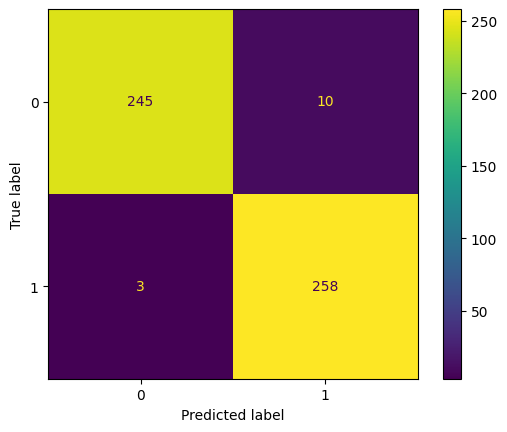

-----------------------------------------

Accuracy: 97.28682170542635
F1 Score: 97.35849056603773
Recall: 98.85057471264368
Precision: 95.91078066914498
ROC AUC: 97.26842461122381
Confusion Matrix:


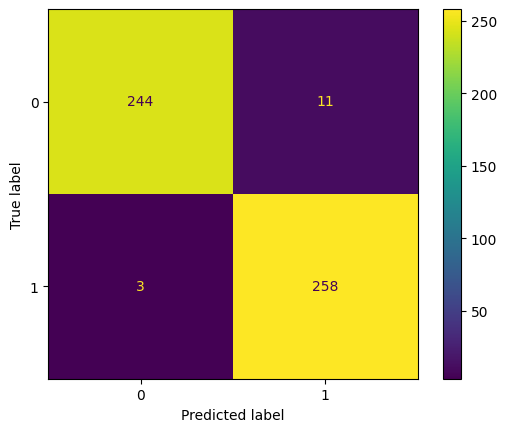

-----------------------------------------

Accuracy: 97.28682170542635
F1 Score: 97.35849056603773
Recall: 98.85057471264368
Precision: 95.91078066914498
ROC AUC: 97.26842461122381
Confusion Matrix:


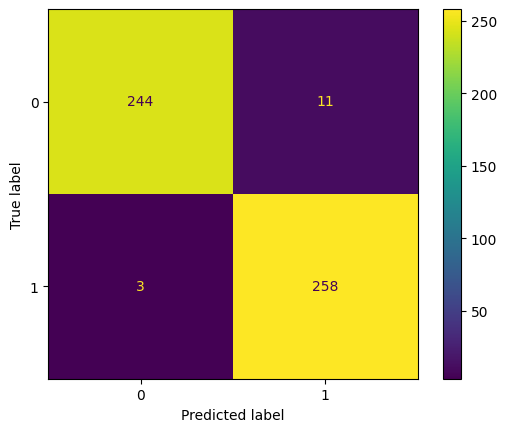

-----------------------------------------

Accuracy: 97.48062015503875
F1 Score: 97.54253308128543
Recall: 98.85057471264368
Precision: 96.26865671641791
ROC AUC: 97.46450304259635
Confusion Matrix:


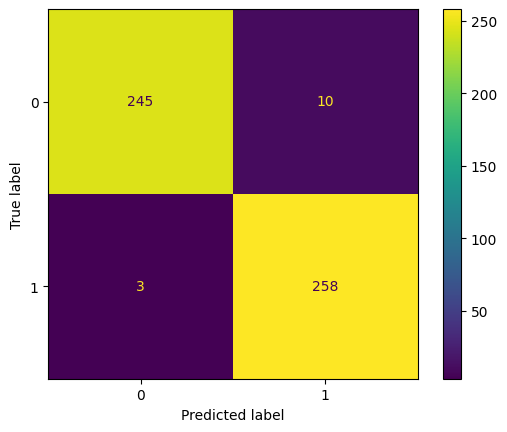

-----------------------------------------



In [27]:
from sklearn.ensemble import StackingClassifier

'''
base_learners = [('rf', RandomForestClassifier(criterion='entropy', max_features='auto', min_samples_leaf=1, min_samples_split=3, n_estimators=100)), 
                ('mlp', MLPClassifier(max_iter=500, activation='relu', alpha=0.001, hidden_layer_sizes=(20,), learning_rate='adaptive', solver='adam')),
                ('knn', KNeighborsClassifier(algorithm='auto', leaf_size=15, n_neighbors=20, p=1, weights='distance')), 
                ('svm', SVC(C=10, kernel='rbf', tol=0.001))]
'''

base_learners_set1 = [('rf', RandomForestClassifier(criterion='entropy',  min_samples_leaf=1, min_samples_split=3, n_estimators=100)), 
                ('mlp', MLPClassifier(max_iter=500, activation='relu', alpha=0.001, hidden_layer_sizes=(20,), learning_rate='adaptive', solver='adam')),
                ('knn', KNeighborsClassifier(algorithm='auto', leaf_size=15, n_neighbors=20, p=1, weights='distance'))]

base_learners_set2 = [('rf', RandomForestClassifier(criterion='entropy', min_samples_leaf=1, min_samples_split=3, n_estimators=100)), 
                ('mlp', MLPClassifier(max_iter=500, activation='relu', alpha=0.001, hidden_layer_sizes=(20,), learning_rate='adaptive', solver='adam')), 
                ('svm', SVC(C=10, kernel='rbf', tol=0.001))]

base_learners_set3 = [('rf', RandomForestClassifier(criterion='entropy', min_samples_leaf=1, min_samples_split=3, n_estimators=100)),
                ('knn', KNeighborsClassifier(algorithm='auto', leaf_size=15, n_neighbors=20, p=1, weights='distance')), 
                ('svm', SVC(C=10, kernel='rbf', tol=0.001))]

base_learners_set4 = [('mlp', MLPClassifier(max_iter=500, activation='relu', alpha=0.001, hidden_layer_sizes=(20,), learning_rate='adaptive', solver='adam')),
                ('knn', KNeighborsClassifier(algorithm='auto', leaf_size=15, n_neighbors=20, p=1, weights='distance')), 
                ('svm', SVC(C=10, kernel='rbf', tol=0.001))]

base_learners = []
base_learners.append(base_learners_set1)
base_learners.append(base_learners_set2)
base_learners.append(base_learners_set3)
base_learners.append(base_learners_set4)

for base_learner_group in base_learners:

    meta_learner = LogisticRegression()

    clf = StackingClassifier(estimators=base_learner_group, final_estimator=meta_learner)

    # Train the stacked model on the full training data
    clf.fit(X_train, y_train)

    predictions = clf.predict(X_test)

    # Get the evaluation metrics
    print('Accuracy:', accuracy_score(y_test, predictions)*100)
    print('F1 Score:', f1_score(y_test, predictions)*100)
    print('Recall:', recall_score(y_test, predictions)*100)
    print('Precision:', precision_score(y_test, predictions)*100)
    print('ROC AUC:', roc_auc_score(y_test, predictions)*100)
    print('Confusion Matrix:')
    cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix(y_test, predictions), display_labels = [0, 1])
    cm_display.plot()
    plt.show()
    print('-----------------------------------------\n')
    
